### instalação de libs (necessário rodar, mas pode ignorar)

Obs.: Após rodar pela primeira vez, será necessário reiniciar o ambiente de execução. Por isso, rode essa célula antes de rodar o restante do notebook para não perder tempo :)

In [1]:
!pip install --upgrade --force-reinstall spacy 

     |████████████████████████████████| 6.0 MB 5.4 MB/s 
     |████████████████████████████████| 76 kB 2.5 MB/s 
     |████████████████████████████████| 451 kB 46.0 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 953 kB 57.5 MB/s 
     |████████████████████████████████| 40 kB 4.3 MB/s 
     |████████████████████████████████| 15.7 MB 212 kB/s 
     |████████████████████████████████| 10.1 MB 46.6 MB/s 
     |████████████████████████████████| 133 kB 81.0 MB/s 
     |████████████████████████████████| 9.9 MB 46.7 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 628 kB 75.8 MB/s 
     |████████████████████████████████| 125 kB 74.6 MB/s 
     |████████████████████████████████| 181 kB 79.6 MB/s 
     |████████████████████████████████| 97 kB 7.2 MB/s 
     |████████████████████████████████| 58 kB 5.9 MB/s 
     |████████████████████████████████| 61 kB 8.0 MB/s 
     |██████████████████████

In [2]:
import sys
!{sys.executable} -m spacy download pt_core_news_lg

     |████████████████████████████████| 577.4 MB 5.2 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


# Textos são séries temporais?


Textos são estruturas sequenciais de dados. Inerentemente, qualquer sequência pode ser representada como uma série temporal. No nosso caso, o texto não tem em si uma marcação de "tempo", mas existe sim uma sequência lógica na qual as palavras são lidas, e por isso podemos atribuir a cada uma delas um "id", que diz respeito à ordem da palavra no texto. Por exemplo, se tivermos a frase:

```
Eu gosto de Madagascar.
```

Podemos atribuir o id a cada uma das palavras da seguinte forma:

```
Eu - 1
Gosto - 2
De - 3
Madagascar - 4
```

E, simples assim, temos nossa sequência "temporal".

Neste notebook, vamos pensar em mais alguns outros problemas relacionados à transformação de textos em séries temporais, implementar essa transformação e analisar nossos resultados.

# Criação da variável de "tempo"

Para este nosso exemplo, usaremos a letra da música "Eu me remexo muito", do filme Madagascar.

In [1]:
#@title Clique se quiser dar uma olhadinha na música :)
eu_me_remexo_muito = '''
Eu me remexo muito
Eu me remexo muito
Eu me remexo muito
Remexo...
Muito

Eu me remexo muito
Eu me remexo muito
Eu me remexo muito
Remexo...
Muito

Eu me remexo muito
Eu me remexo muito
Eu me remexo muito
Remexo...
Muito

Ae, garotas do mundo todo
O rei julien original está na área ai gente
Eu adoro todas as garotas que gostam de mexer com o
corpo
Quando vocês mexerem o corpo
Sejam graciosas, meigas e sexy
Tá legal?

Minha gatinha tem um corpo escultural
Não precisa maquiagem tem beleza original
Minha gatinha tem um corpo escultural
Não precisa maquiagem tem beleza original

tá com tudo em cima
tá com tudo em cima
tá com tudo
tá com tudo

tá com tudo em cima
tá com tudo em cima
tá com tudo em cima
tá com tudo
tá com tudo
tá com tudo em cima

Vem, vai, no meu pique
Navega no oceano como o grande titanic

Eu disse vem, vai, sem chilique
Navega no oceano como o grande titanic

Vem, vai, no meu pique
Navega no oceano como o grande titanic

Eu disse vem, vai, sem chilique
Navega no oceano como o grande titanic

Eu me remexo muito
Eu me remexo muito
Eu me remexo muito
Remexo...
Muito

Eu me remexo muito
Eu me remexo muito
Eu me remexo muito
Remexo...
Muito

Minha gatinha tem um corpo escultural
Não precisa maquiagem tem beleza original

Minha gatinha tem um corpo escultural
Não precisa maquiagem tem beleza original

(com rimel)
Toda maquiagem me enlouquece (pankake)
Toda maquiagem me enlouquece (passa o lapis)
Toda maquiagem me enlouquece (batom na boca)
Toda maquiagem me enlouquece

Rostinho bonito
Mexendo o quadril
Olhando pra você meu queixo caiu
Já vi que você está entrando no meu pique
Navega no oceano como o grande titanic

Rostinho bonito
Mexendo o quadril
Olhando pra você meu queixo caiu
Já vi que você está dançando sem xilique
Navega no oceano lá vai o titanic

Muito
Eu me remexo muito
Eu me remexo muito
Eu me remexo muito
Remexo...muito!!

Eu me remexo muito
Ele remexe muito
Ela remexe muito
Nós remexemos muito
Eles remexem muito
Você remexe muito'''

Um pouco mais para a frente, vamos precisar usar algumas funções da biblioteca [SpaCy](https://spacy.io/), que instalamos no começo deste notebook (se você ainda não rodou a primeira célula, esta é a hora!). Por isso, a primeira coisa que vamos fazer é importar a lib, carregar o modelo `pt_core_news_lg` e passar nosso texto pelo modelo (pode demorar alguns segundinhos).

<body>
    <details>
        <summary>Por quê usar o pt_core_news_lg?</summary>
        O SpaCy oferece diversos modelos pré-treinados que nos fornecem informações úteis sobre as palavras dos nossos textos, como sua classe gramatical, análise sintática, entre outros. Para isso, no entanto, precisamos informar ao SpaCy qual modelo queremos utilizar para que ele processe nosso texto corretamente. <br>
  <br>Os modelos do SpaCy são subdivididos em idiomas, e cada idioma pode ter vários modelos que foram treinados com conjuntos de dados de diferentes tamanhos. O próprio nome do modelo já traz todas essas informações: "pt" quer dizer que o modelo é em Português; "core_news" quer dizer que foi treinado em textos de notícias; "lg" quer dizer large, ou seja, que foi treinado em um conjunto de dados grande. É comum os modelos terem sua versão "sm" (small), "md" (medium) e "lg" (large); cada um tem uma finalidade diferente. <br>
      <br>O tamanho mais usado de modelo em aplicações simples é o "sm". Isso porque lá já existe a maioria das palavras usadas no idioma, então aplicações relativamente simples já conseguem ter um bom desempenho, tendo um gasto singelo de memória. <br>
      <br>No entanto, uma das features que vamos usar hoje é o .vector, a representação dessa palavra no espaço (os famosos Word Embeddings; veja <a href="https://spacy.io/usage/linguistic-features#vectors-similarity">aqui</a> para saber mais). O problema dessa feature é que, para a criação de um vetor que descreve uma palavra, geralmente são necessárias várias dimensões (de 100 a 300 dimensões é o comum!). Para criar esse número de dimensões, por sua vez, precisamos de um conjunto imenso de dados, para que nosso espaço não fique tão esparso que comparações sejam sem sentido. Dessa forma, utilizar um modelo "sm" para análise de embeddings pode ser uma grande perda de tempo. Por isso, teremos que usar a versão lg.
    </details> 
</body>
<br>


In [2]:
import spacy
nlp = spacy.load('pt_core_news_lg')
musica = nlp(eu_me_remexo_muito)

Felizmente, agora nosso texto já está dividido em palavras, ou *tokens*. Tokens são basicamente palavras, porém podem ser também pontuações ou irritantes quebras de linha ('\n'). Por isso, queremos tirar essas quebras de linha e pontuações da nossa lista de palavras. Felizmente, isso tambémm é muito fácil: basta usar o atributo `is_alpha` que o SpaCy já providencia, que retorna `True` caso o token seja uma palavra, e `False` caso contrário.

In [10]:
tokens = [i.text for i in musica if i.is_alpha]
tokens[:10]

['Eu', 'me', 'remexo', 'muito', 'Eu', 'me', 'remexo', 'muito', 'Eu', 'me']

Com nossa lista de tokens pronta, podemos simplesmente criar uma lista com uma contagem do tamanho dessa lista de tokens. Para isso, vamos utilizar a função `range`.

In [13]:
ordem = list(range(len(tokens)))
ordem[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

A seguir, só vamos juntar as palavras e seu "id" de ordem na música, para conseguirmos visualizar melhor.

In [14]:
token_ordem = [(tokens[i], ordem[i]) for i in range(len(tokens))]
token_ordem[:10]

[('Eu', 0),
 ('me', 1),
 ('remexo', 2),
 ('muito', 3),
 ('Eu', 4),
 ('me', 5),
 ('remexo', 6),
 ('muito', 7),
 ('Eu', 8),
 ('me', 9)]

E pronto! Agora podemos criar nosso DataFrame com Pandas, que utilizaremos muito mais nos próximos "capítulos" para analisar nossa série temporal. Para isso, basta passar para o construtor do DataFrame a nossa lista de tuplas (palavra, ordem).

In [16]:
import pandas as pd
musica_no_tempo = pd.DataFrame(token_ordem)
musica_no_tempo.columns = ['palavra', 'ordem']
musica_no_tempo.head()

,palavra,ordem
0,Eu,0
1,me,1
2,remexo,2
3,muito,3
4,Eu,4


# O valor de uma palavra

Agora, nós já temos a nossa variável de tempo, mas ainda temos um grande problema: é impossível representar uma string num plano cartesiano. Como vamos fazer para transformar uma palavra, ou seja, uma string cheia de letras, em números? Ou, pior ainda, como transformar uma palavra em *um único número*? Isso será essencial se quisermos visualizar nossa série temporal, que é o objetivo deste notebook.

Para isso, vamos utilizar a *feature* que já comentamos um pouco mais acima: o `.vector`. O SpaCy, no modelo lg, também nos dá essa informação de mão beijada. Vamos ver um exemplo a seguir:

In [31]:
cachorrinho = nlp('cachorrinho')
print(cachorrinho.vector)

[ 1.1363e+00 -2.2137e+00 -1.2936e-01  2.0902e+00  1.0937e+00 -1.6894e+00
  5.6517e-01  1.3838e+00 -8.5134e-01  1.1674e+00  8.7096e-01  3.0585e-03
  9.2434e-01 -1.9567e+00  1.4618e+00  3.1508e-01  1.8554e+00 -9.2518e-01
 -7.6186e-01  5.1648e-01 -1.4717e+00  3.8250e-02  1.4853e+00 -2.4631e-02
  3.0089e-01  1.2944e+00 -1.4259e+00 -2.8045e-01 -4.5163e-02 -9.6273e-01
  5.4063e-01  7.8705e-01 -1.2453e+00  3.7749e-01  5.0852e-01  1.5313e+00
 -1.5654e+00  1.6267e+00  9.3324e-01  1.0459e+00 -2.0981e+00 -5.8096e-01
  7.8513e-01 -7.7404e-01  4.3009e-01  1.1985e+00 -5.2212e-01 -1.4373e+00
  1.0900e+00 -1.6963e-01  3.7277e-01  3.1591e+00  1.3281e-01  6.3712e-01
 -1.6412e+00  6.2332e-01  4.5231e-01 -1.7752e+00 -1.4475e+00  1.0624e+00
 -1.8723e-01  1.0554e-01  1.9356e+00 -4.2889e-01 -7.1585e-01 -2.7545e-01
  1.2348e+00  1.4303e+00  6.5567e-01 -5.2213e-01  2.4122e-01  1.7666e-01
  2.9920e-01 -1.7297e+00  7.8693e-01 -1.1581e+00 -2.4474e-02  1.1693e+00
 -2.5546e+00  1.7659e-01 -1.2580e+00 -1.0399e+00  7

E, como mágica, transformamos uma palavra em números! No entanto, ainda temos um problema. São muitos números!

In [32]:
len(cachorrinho.vector)

300

Uma forma de transformar a palavra num número só (talvez não a ideal, mas que serve para nossos objetivos aqui), é utilizar uma técnica bem conhecida na álgebra linear: a norma. A norma de um vetor é basicamente o tamanho do vetor, ou seja, um número real não negativo (para saber mais, veja [aqui](https://pt.wikipedia.org/wiki/Norma_(matem%C3%A1tica))). Dessa forma, conseguiremos pelo menos distinguir as palavras entre si, e seremos finalmente capazes de plotar nossa série temporal num plano cartesiano.

O SpaCy também nos dá essa informação de mão beijada, no atributo `vector_norm`.

In [17]:
musica_no_tempo['palavra_norm'] = [i.vector_norm for i in musica if i.is_alpha]
musica_no_tempo.head()

,palavra,ordem,palavra_norm
0,Eu,0,96.825958
1,me,1,107.658043
2,remexo,2,16.208626
3,muito,3,32.886951
4,Eu,4,96.825958


# Plotando as séries temporais

Chegamos no momento tão esperado! Como o foco deste notebook é a transformação do texto numa série temporal e a interpretação dos gráficos, as funções criadas para plotar os gráficos não vão ser exploradas, mas o código está aqui para quem quiser dar uma olhada.

In [40]:
#@title Funções para plotagem das séries temporais
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

def grafico(dataset, x, y, titulo, subtitulo, labels):
  p = sns.lineplot(x=dataset[x], 
                  y=dataset[y])
  p.figure.set_size_inches(20, 5)
  p.set_title(titulo, loc='left', fontsize=18, pad=30)
  p.figure.text(x=0.125, y=0.91, s=subtitulo, fontsize=12)
  p.set_xlabel(labels[0], fontsize=14)
  p.set_ylabel(labels[1], fontsize=14)
  return p

Primeiro, vamos plotar a variação da norma das palavras pelo tempo. Nosso objetivo será apenas encontrar os padrões da letra da música no gráfico, e tentar encontrar insights sobre a natureza dessa música (se é repetitiva ou não, em quais pontos ela possui estruturas semelhantes em cadeia, se ela possui alguma "tendência" de sentido, etc).

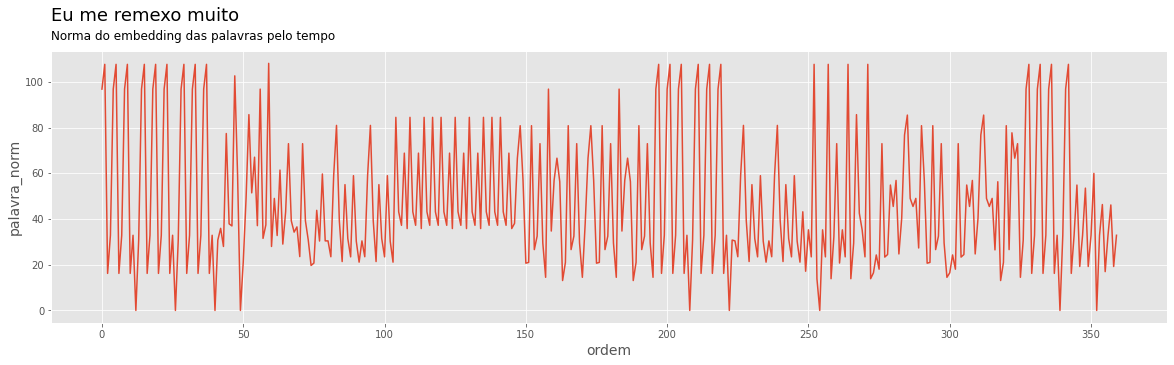

In [46]:
g1 = grafico(musica_no_tempo, 
        x = 'ordem', y = 'palavra_norm', 
        titulo = 'Eu me remexo muito', 
        subtitulo = 'Norma do embedding das palavras pelo tempo', 
        labels=['ordem', 'palavra_norm'])

Conseguimos ver algumas estruturas semelhantes ao longo do tempo, mas ainda é bem difícil distinguir padrões. Isso acontece porque a norma das palavras tem muita variação. Vamos ver uma análise descritiva deste campo no nosso dataframe:

In [60]:
musica_no_tempo[['palavra_norm']].describe()

,palavra_norm
count,360.000000
mean,47.662541
std,29.302306
min,0.000000
25%,24.651009
50%,37.162306
75%,68.817886
max,108.090225


Nosso desvio padrão é de 29 e nossa média é de 47. Vamos ver qual é o nosso *coeficiente de variação*, ou seja, o desvio padrão dividido pela média:

In [62]:
print('Coef. de var =', 29.302306/47.662541)

Coef. de var = 0.6147869036189237


E vemos que a nossa variável tem mais de 60% de variação. Este é considerado um coeficiente alto, e pela grande diferença entre o mínimo e o máximo (~47 unidades), fica difícil "enxergar" os padrões. Por isso, vamos utilizar uma técnica bem simples e bem utilizada em análise de séries temporais: a média móvel.

# Facilitando a visualização: média móvel


Quando temos uma série temporal ruidosa, é comum aplicar a média móvel para suavizar essa curva, para que sejamos capazes de entendê-la melhor. A média móvel simples tem um funcionamento bem intuitivo, explicado a seguir.

> Um dos parâmetros que precisamos passar para a média móvel é o tamanho do "passo", ou janela. Esse passo será o número de registros anteriores que consideraremos no nosso cálculo de média; no nosso caso, o número de palavras anteriores. Se nossa janela for 10, por exemplo, começaremos o cálculo apenas na décima palavra: dessa forma, podemos pegar o valor das 9 últimas palavras, fazer a média desses valores com a palavra atual, e substituir o valor da palavra atual pela média resultante. Quando damos um passo, chegamos na décima primeira palavra: agora podemos pegar o valor da palavra 2 até a palavra 10, fazer a média dessas palavras com a palavra 11 e substituir o valor da palavra 11 por essa média, e assim por diante. Veja [aqui](https://pt.wikipedia.org/wiki/M%C3%A9dia_m%C3%B3vel) uma explicação mais detalhada.

Felizmente, o pandas nos fornece uma função que torna o cálculo da média móvel bem simples: a função `rolling`. Precisamos passar apenas o número que utilizaremos para nossa janela, e *voilà*!

In [ ]:
musica_no_tempo['mm10'] = musica_no_tempo['palavra_norm'].rolling(10).mean()

Assim como no nosso exemplo, utilizamos uma média móvel de 10 palavras, mas isso também pode ser ajustado de acordo com as preferências de quem analisará a série temporal. Antes de plotar nossa média móvel, vamos ver se a sua aplicação gerou o efeito desejado, ou seja, se ela diminuiu o nosso coeficiente de variação:

In [67]:
musica_no_tempo[['mm10']].describe()

,mm10
count,351.000000
mean,47.583103
std,8.174967
min,30.652247
25%,41.928857
50%,47.401490
75%,53.794446
max,71.164316


Vemos que nosso desvio padrão, que antes era de ~29, agora assume um valor bem mais singelo de ~8. Vamos calcular o nosso novo coeficiente de variação:

In [68]:
print('Coef. de var =', 8.174967/47.583103)

Coef. de var = 0.17180399100916138


E vemos que houve uma diminuição considerável de ~61% para ~17%, então de fato conseguimos o efeito esperado. Nossa expectativa, agora, é a de que será muito mais fácil de visualizar a nossa série temporal e encontrar os padrões.

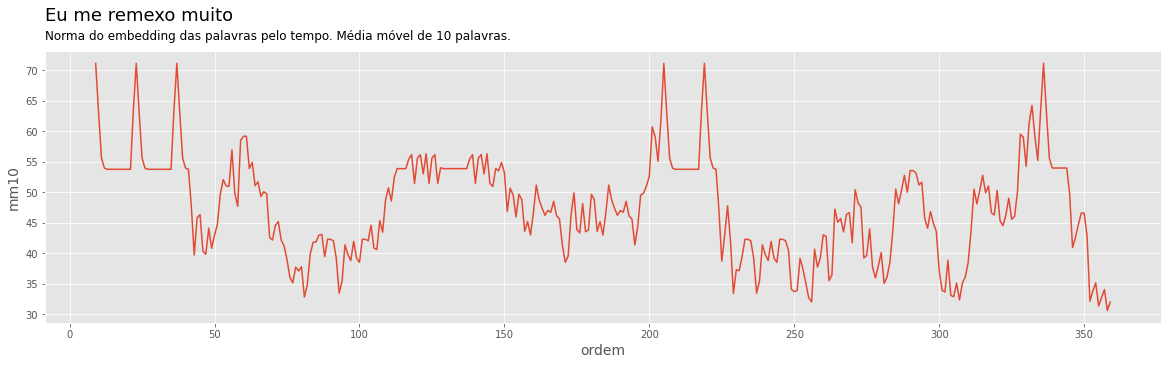

In [70]:
g2 = grafico(musica_no_tempo, 
        x = 'ordem', y = 'mm10', 
        titulo = 'Eu me remexo muito', 
        subtitulo = 'Norma do embedding das palavras pelo tempo. Média móvel de 10 palavras.', 
        labels=['ordem', 'mm10'])

De fato, agora é bem mais simples observar alguns padrões repetitivos na música. Os três primeiros versos, por exemplo, são exatamente iguais, e isso fica claro nos 3 primeiros "picos" do gráfico. Estes 3 primeiros versos se repetem mais à frente, lá pela palavra 200, e podemos ver mais duas "cópias" dessa forma neste "tempo". Novamente vemos algumas repetições similares no final da música, ao redor da palavra 330. E você, quais outros insights você consegue tirar a partir deste gráfico? :)

# Conclusão

Hoje vimos que qualquer sequência pode ser transformada numa série temporal, inclusive textos. Além disso, vimos que existem diversas formas de transformar as palavras em números, e nossa abordagem aqui foi apenas uma exploração das várias possibilidades. Com a série em mãos, somos capazes de aplicar conhecidas técnicas de análise de séries temporais para ter insights interessantes, que vão depender de nossa aplicação. 

De que outras formas poderíamos transformar nossos textos em séries temporais? Existem outros tipos de dados sequenciais que não são comumente transformados em séries temporais, como músicas, genes, etc? Quais outros aspectos dessas séries podemos tentar analisar para gerar novos insights? Deixo esses questionamentos para quem quiser se aventurar :)